## Digital Technologies and Data-Driven Business
# Mandatory Assignment 3

In the following, you find tasks that need to be solved as part of the third mandatory assignment in Digital Technologies and Data-driven Business. Once you solved the tasks, please save the .ipynb file (i.e., _File_ >> _Download as_ >> _Notebook (.ipynb)_) and upload the saved file to Canvas. The deadline is __November 4 at 10:00__. Mandatory assignments are either __approved__ or __not approved__. If a mandatory assignment is not approved, you will have the opportunity for a retake. 

Please read the instructions carefully and pay particular attention to the following points:
1. Please provide correct Python code (i.e., code that can be executed without errors).
2. Explain the code you have written in your own words (either with markdown or comments).
3. You may work in groups but your submission must be individual, i.e. you each have to provide a functioning .ipynb file with __your own__ solutions and explanations. Do not copy the answers from others. Answers that are not your own (plagiarized) will lead to the mandatory assignment not being approved.

Good luck.

### Copenhagen Bank

Despite your great insights, RideDenmark has not been able to establish itself in the Danish market and closed down business. However, your skills are now well known in Copenhagen and a nearby bank has requested your services as part of their customer insights team. They have had a lot of customers leaving recently and they want to understand why customers are leaving so they can address the issue in advance.

Emma, who is your new supervisor has extracted some data from the system regarding customer records. She sent it as a file named `bank-customers.csv` and left some questions that you can find below.

__Emma:__ _We had a lot of customers leaving us recently. We would like to explore what attributes of customers contribute to this churn. Can you please help us with that?_

__Important:__ Through the assignment you will be manipulating the dataframe in order to prepare it for machine learning. When you start a new task, you should always continue with the updated dataframe (do not import the data again after Task 1).

## Installing and importing libraries

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-learn

In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix

# This command helps you to show all columns
pd.set_option('display.max_columns', None)

# Task 1 (1 point)

Read the file named `bank-customers.csv`.

In [40]:
# Write your answer here
df=pd.read_csv('bank-customers.csv')

# Task 2 (2 points)

__Emma:__ _The dataset contains a list of customer records. The column `Churn` indicates if the customer has left the bank. Please make a simple plot showing the distribution of this column._

<Axes: xlabel='Churn', ylabel='Count'>

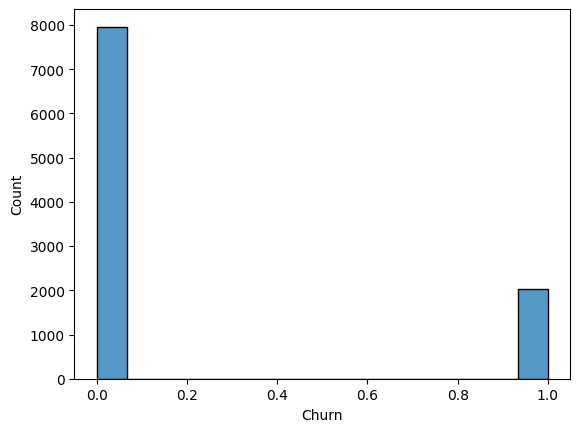

In [41]:
# Write your answer here
dfpr=df['Churn'].to_frame()
sns.histplot(dfpr, x='Churn')

__Emma:__ _Please also determine the distribution in absolute numbers._

In [42]:
# counting Churn values
df['Churn'].value_counts()

Churn
0    7962
1    2038
Name: count, dtype: int64

# Task 3 (1 points)

__Emma:__ _The columns `CustomerID` and `Surname` might not give us relevant information in predicting our target. Please drop these columns._

In [43]:
# Using drop to get rid of the columns
dfdrop=df.drop(['CustomerId','Surname'], axis= 1)
dfdrop

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned
0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300
9996,9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771
9997,9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564
9998,9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339


# Task 4 (2 points)

__Emma:__ _Could you please indicate the statistical correlations between the numerical columns in a heatmap?_

_Hint:_ Seaborn has a built-in `heatmap()` feature.

<Axes: >

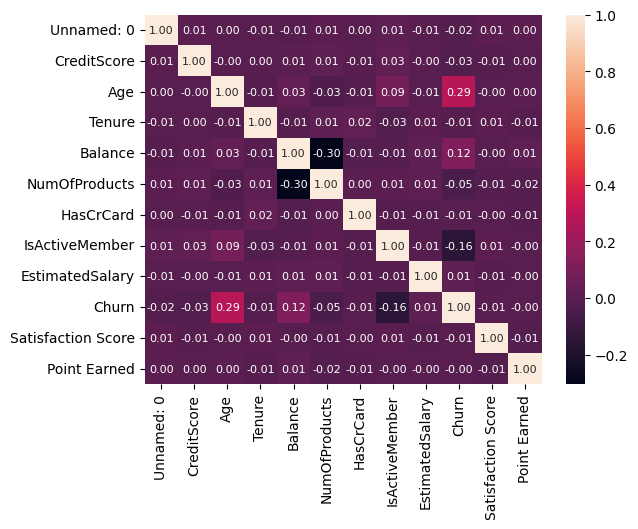

In [44]:
# Write your answer here
dfnum= dfdrop.select_dtypes(include=['number'])
Cormatrix = dfnum.corr()
sns.heatmap(Cormatrix, annot= True, annot_kws={"size": 8}, fmt=".2f")

__Emma:__ _Which attribute seems to have the highest positive and which the highest negative correlation with our target variable (`Churn`)?_

__Write your answer here:__


Age seems to have the highest correlation with churn while IsActiveMember seems to have the highest negative correlation

# Task 5 (1 point)

__Emma:__ _In order to use all of the remaining columns, we need to convert the categorical columns to numerical columns. Therefore, each card type has been assigned a score. Could you please edit the column `Card Type` so that the strings are replaced with the following numbers?_

DIAMOND: 5<br>
PLATINUM: 3.5<br>
GOLD: 2.5<br>
SILVER: 1

_Hint:_ Look at the pandas `map` method.

In [45]:
# Write your answer here
# making a dictionary to map all of our values at once instead of one type at a time 
cardmap = {'DIAMOND': 5,'PLATINUM': 3.5,'GOLD': 2.5,'SILVER': 1}

# Replace the values in the `Card Type` column using the map function
df['Card Type'] = df['Card Type'].map(cardmap)
df.head(5)

,Unnamed: 0,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned
0,0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,5.0,464
1,1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,5.0,456
2,2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,5.0,377
3,3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,2.5,350
4,4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,2.5,425


# Task 6 (2 points)

__Emma:__ _We still have two categorical columns that we need to alter using a process called one-hot encoding. Please encode `Geography` and `Gender` using one-hot encoding._

_Hint:_ Why do we need [one-hot encoding](https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db) and what is it?

_Hint2:_ Take a look at the pandas documentation about [one-hot encoding](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [46]:
# Write your answer here'
dfdum=pd.get_dummies(df, columns=['Geography','Gender'])
df=dfdum
df.head(5)

,Unnamed: 0,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,2,5.0,464,True,False,False,True,False
1,1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,3,5.0,456,False,False,True,True,False
2,2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,3,5.0,377,True,False,False,True,False
3,3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,5,2.5,350,True,False,False,True,False
4,4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,5,2.5,425,False,False,True,True,False


# Task 7 (2 points)

__Emma:__ _My colleague told me that a crucial concept when working with most machine learning algorithms is to split your data into train and test data._

_He also showed me that the following code splits your existing DataFrame into a test set and a train set. In this case, 80% of the data will be hosted in the train set, the remaining 20% will be hosted in the test set._

_However, I still do not quite understand why one would want to split the dataset into two parts (train and test). Could you maybe give me some usefull insights?_

Hint: Please describe in your own words. The lecture and readings provide useful information. Your answer should be min. 80 words.

In [ ]:
# code provided by Emma's colleague
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

__Write your answer here__
In machine learning it is important to split your data into train and test to stop overfitting which means the model fits precisely to the data. The result of this can be that you can no longer use it for prediction or forecasting as the model is only good at recognising only the data you have given it. the test data helps the model reach the right fit which allows it to recognize and effectively work with data that is not originaly in either the test or the training data set.

# Task 8 (2 points)

__Emma:__ _Thank you for the explanation. Now we need to get started with the machine learning. Could you please help split the data into a training and test dataset?_

_Hint:_ The easiest way to split our data is using the built-in function `train_test_split` in Sci-Kit Learn. Before you make the actual split you should create the following variables, so the train_test_split knows what your target is and which attributes you want to use in the prediction:<br>

__X__ - Should contain all the columns except the target.<br>
__y__ - Should only contain the target column.

The test size should be __30%__.

You should end up having four variables that are named X_train, X_test, y_train, and y_test.

In [52]:
# Write your answer here
dfX=df.drop(['Churn','Surname'], axis=1)
dfY=df['Churn']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.30, random_state=1, stratify=dfY)

# Task 9 (2 points)

__Emma:__ _Let's try to create our first model using the DecisionTreeClassifier from Sci-Kit Learn. One of our colleagues has provided us with the following code._

In [53]:
DTC = DecisionTreeClassifier(criterion = "entropy", max_depth = 3).fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print(f'Accuracy: {DTC.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.8396666666666667
Precision: 0.8385416666666666
Recall: 0.2635024549918167


__Emma:__ _Could you please help interpret the results for me? What does the accuracy, precision, and recall mean. And was our first model a success. Why/why not?_

Write a minimum of 80 words.

__Write your answer here__

An accuracy of 84% is really good straight out the box with no tweaking. The accuracy statistic measures how many times the model predicted correctly in all of the predictions.<br>
Accuracy: 0.8396666666666667<br>

A precision of 84% is also really good. Precision measures how many times it said positive and was correct.<br>
Precision: 0.8385416666666666<br>

A Recall of 26% is actually pretty bad. Recall is how many of the actual positive the model caught which means that out of 100% of the true positives in our datasets it only identified 26% of them.<br>
Recall: 0.2635024549918167<br>



Whether this model is successful depends on your goal. If your primary objective is to accurately identify all positive cases (where high recall is really important), then this model is not very good because it misses around 73.65% of actual positives. However, if precision and general accuracy are more important, this model may still be considered relatively successful

# Task 10 (2 points)

__Emma:__ _The code below allows us to plot the decision tree for our model. Please explain what you see. Explain how to read the contents of the nodes (i.e., boxes)._

Write a minimum of 50 words.

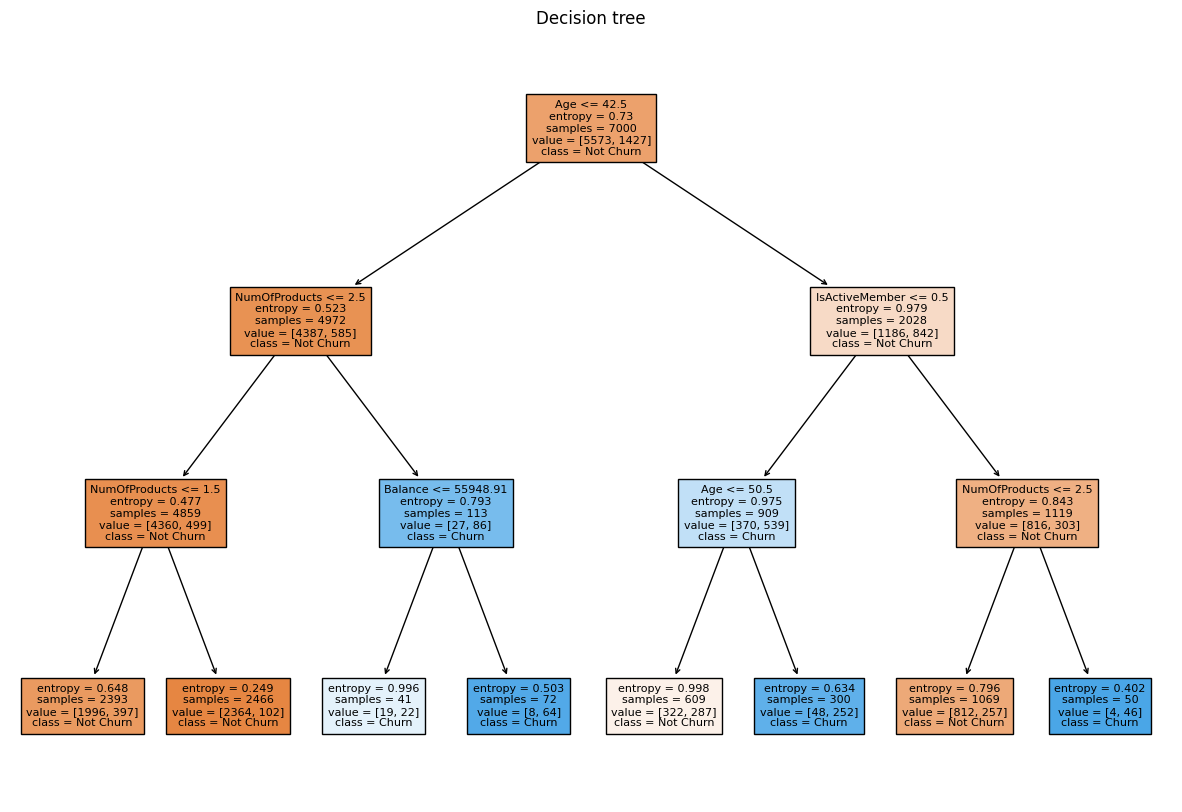

|--- Age <= 42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- Balance <= 55948.91
|   |   |   |--- class: 1
|   |   |--- Balance >  55948.91
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- IsActiveMember <= 0.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: 0
|   |   |--- Age >  50.50
|   |   |   |--- class: 1
|   |--- IsActiveMember >  0.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- class: 0
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1



In [58]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

plt.figure(figsize=(15,10))
class_names = ['Not Churn', 'Churn']
plot_tree(DTC, max_depth=3, fontsize=8, feature_names=dfX.columns.tolist(), filled=True, class_names=class_names)
plt.title("Decision tree")
plt.show()

trules = export_text(DTC, feature_names=dfX.columns.tolist())
print(trules)

__Write your answer here__<br>

The first line of the node explains the split condition if there is a split it then splits with under value being to the left and the above value on the right. Entropy helps to present Sample purity. Value shows the values of each sample at the node in our case the target column is churn and a could be churn and b could be not churn so if it shows [1473,235] (purely hypothetical numbers) then there would be 1473 customers that have churned and 235 that have not this can be useful for purity 

# Task 11 (2 points)

__Emma:__ _In order to better understand the results we should maybe create a confusion matrix to visualize our data. I have found the following code, but I am having trouble reading the visualization. Can you please help me? What does the different numbers mean?_

Write a minimum of 40 words.

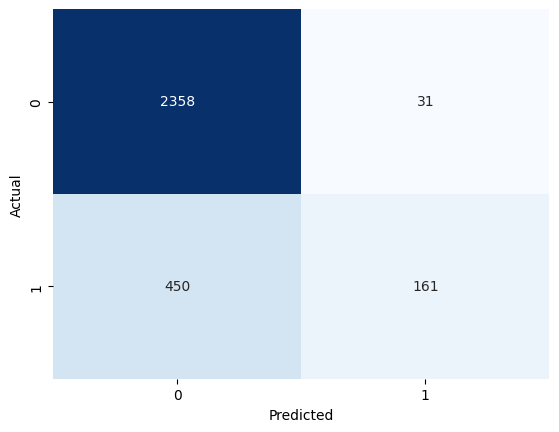

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues')

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

__Write your answer here__<br>

a Confusion matrix can be read like a table if actual and predicted overlap then you have a true or a correct positive or negative if they do not then you have a false or incorrect positive or negative. in our case we have 2358 true negatives and 161 true positives as well as 450 false positives and 31 false negatives

# Task 12 (1 point)

__Emma:__ _In order to obtain some insights from our model I have gotten one of our colleagues to write a code that creates a dataframe that contains the feature importance according to the DecisionTreeClassifier from before. Could you please visualize this in a sorted barchart?_

In [57]:
data = list(zip(X_train.columns.to_list(), DTC.feature_importances_))
feature_importance = pd.DataFrame(data, columns=['Feature', 'Importance'])

<Axes: xlabel='Importance', ylabel='Feature'>

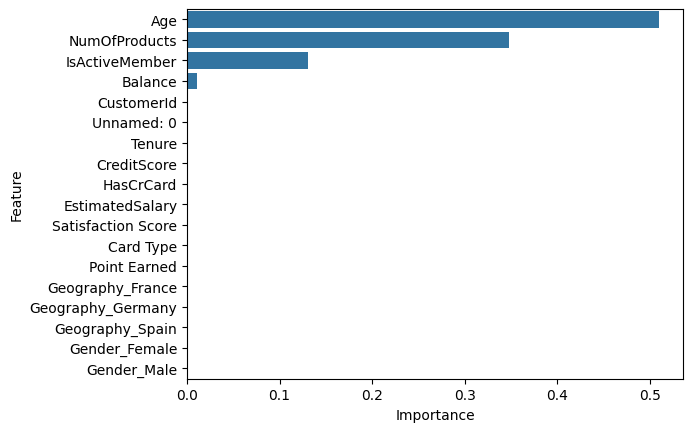

In [61]:
# Write your answer here
ftimp=feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=ftimp)

# Task 13 (2 points)

__Emma:__ _Now let's try to see if we can make our model even better. We should try tuning the `max_depth` hyperparameter of the DecisionTreeClassifier. Create a for loop that stores the accuracy, precision, and recall of models with a `max_depth` of 3, 5, 10, 15, 20. I have created a result dataframe that you can use to store the data of the different iterations._

_Hint:_ You can reuse much of the code from previous tasks.

In [65]:
result_df = pd.DataFrame(columns=['max_depth', 'Accuracy', 'Precision', 'Recall'])

In [79]:
# Write your answer here
max_depths = [3, 5, 10, 15, 20]
results = []
# Looping through the max_depth values
for depth in max_depths:
    #training the model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  
    
    # Storing the results in the List
    results.append({'max_depth': depth, 'accuracy': accuracy, 'precision': precision, 'recall': recall})
result_df = pd.DataFrame(results)
# Displaying the results
print(result_df)

   max_depth  accuracy  precision    recall
0          3  0.839667   0.838542  0.263502
1          5  0.851000   0.838843  0.332242
2         10  0.842000   0.659674  0.463175
3         15  0.807333   0.529101  0.490998
4         20  0.797667   0.503268  0.504092


__Emma:__ _Which `max_depth` gave the highest accuracy? Explain in your own words what the hypterparameter `max_depth` does._

Hint: You could look into the documentation (**https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html**).

__Write your answer here__<br>

The max depth of 5 gave the Highest accuracy. the Max Depth parameter decides how many times a node should iterate and split before stopping if no max depth is set it will keep going until it has reached the minimum sample size or has reache absolute purity.


# Task 14 (2 points)

__Emma:__ _Great work - we got a couple of models to run and extracted a lot of data about the performance. How was your overall impression - did we succeed in making a useful model? Are there any insights I can bring to the executive team. Did we gather some new information based on our machine learning that we did not obtain from our standard statistical correlation?_

_Hint_: Change the `max_depth` hyperparameter in Task 9 to the optimal value from Task 13. Afterwards, run Task 9 to Task 12 again. Write a minimum of 100 words.

__Write your answer here__

Number of products and if they are an active member seems to have more of an effect on churn than the Heatmap shows and finding a way to make our customers more active and getting more products might be a good way to keep customers and prevent churn. the model itself was ok with its glaring flaw being that the Recall was low at a low amount of depth this we of course improved at the end by improving the depth of our model. Age also seemed to play a larger role than initially anticipated in our standard statistical correlation. 

In [77]:
DTC = DecisionTreeClassifier(criterion = "entropy", max_depth = 5).fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print(f'Accuracy: {DTC.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.8536666666666667
Precision: 0.7429378531073446
Recall: 0.43044189852700493


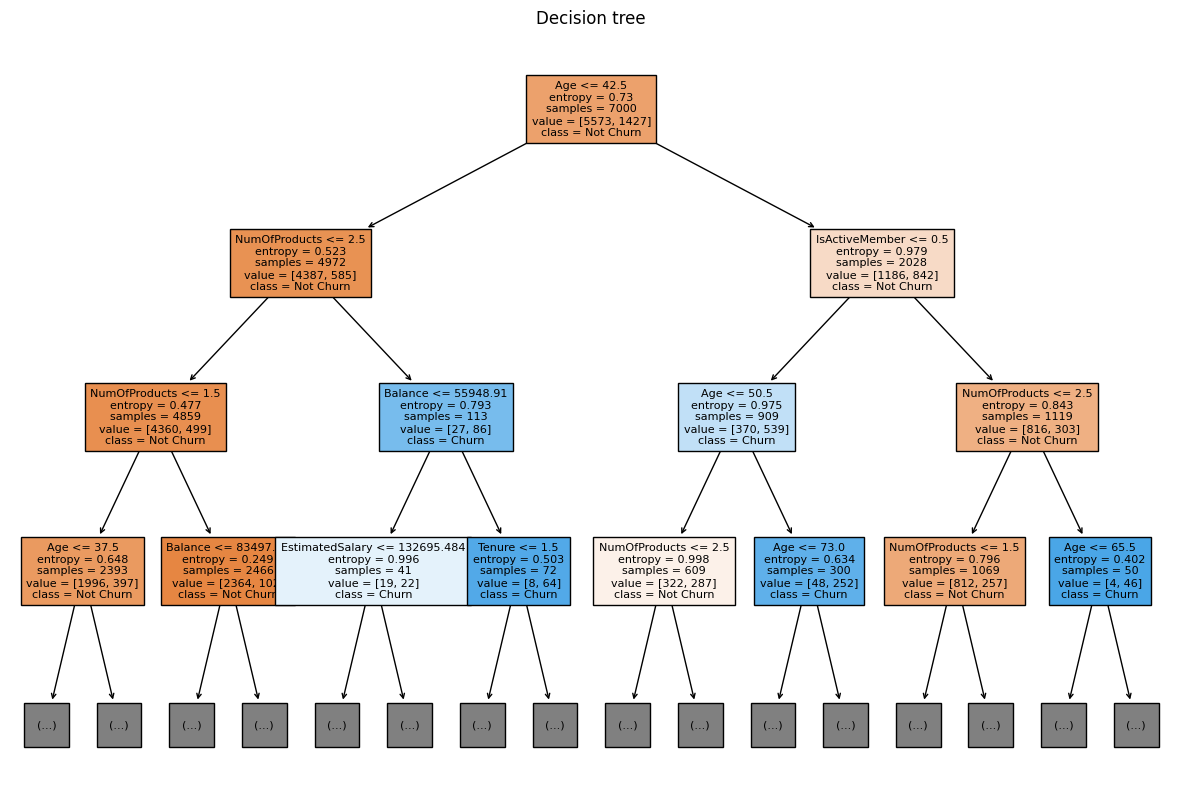

|--- Age <= 42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- Age <= 37.50
|   |   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Geography_Germany >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  37.50
|   |   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Geography_Germany >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- Balance <= 83497.59
|   |   |   |   |--- Age <= 38.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  38.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Balance >  83497.59
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  36.50
|   |   |   |   |   |--- class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- Balance <= 55948.91
|   |   |   |--- EstimatedSalary <= 132695.48
|   |   |   |   |--- Unnamed: 0 <= 5481.0

In [80]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

plt.figure(figsize=(15,10))
class_names = ['Not Churn', 'Churn']
plot_tree(DTC, max_depth=3, fontsize=8, feature_names=dfX.columns.tolist(), filled=True, class_names=class_names)
plt.title("Decision tree")
plt.show()

trules = export_text(DTC, feature_names=dfX.columns.tolist())
print(trules)

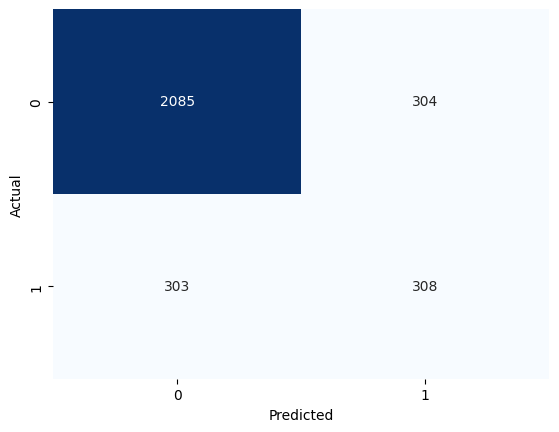

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues')

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [82]:
data = list(zip(X_train.columns.to_list(), DTC.feature_importances_))
feature_importance = pd.DataFrame(data, columns=['Feature', 'Importance'])

<Axes: xlabel='Importance', ylabel='Feature'>

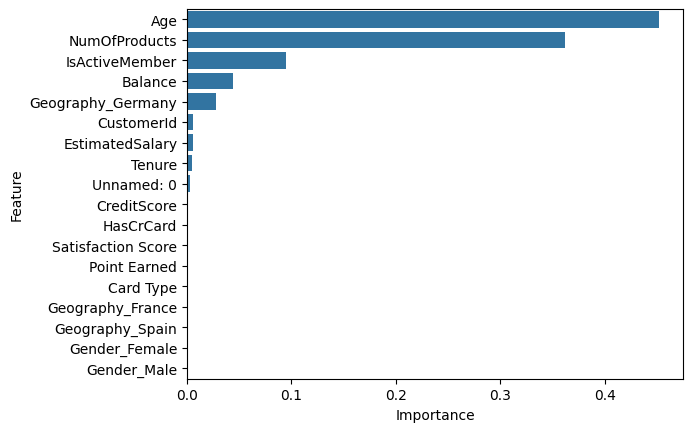

In [83]:
ftimp=feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=ftimp)